# Data Preprocessing

## Importing the libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Dataset

In [14]:
df=pd.read_csv(r'C:\Users\prasa\Desktop\DSA course\Amazon user segmentation\Amazon-user-segmentation-main\Amazon.com cluster model.csv')

In [15]:
df.head()

,Cus_ID,Sex,Age,Income,Rating
0,301219,M,23,53667,150
1,301220,F,32,50420,106
2,301221,M,23,62896,10
3,301222,M,32,55306,22
4,301223,F,34,20634,117


In [16]:
df.shape

(202, 5)

In [17]:
df.dtypes

Cus_ID     int64
Sex       object
Age        int64
Income     int64
Rating     int64
dtype: object

In [18]:
df.describe()

,Cus_ID,Age,Income,Rating
count,202.000000,202.000000,202.000000,202.000000
mean,301319.500000,31.663366,46520.727723,79.668317
std,58.456537,8.898295,15035.827667,42.787150
min,301219.000000,18.000000,20159.000000,3.000000
25%,301269.250000,23.250000,33794.250000,43.250000
50%,301319.500000,29.000000,47619.500000,79.000000
75%,301369.750000,39.000000,59778.750000,117.000000
max,301420.000000,56.000000,69893.000000,150.000000





## Handling Missing Data

In [19]:
df.isnull().sum()

Cus_ID    0
Sex       0
Age       0
Income    0
Rating    0
dtype: int64

## Encoding Categorical Data

In [20]:
df

,Cus_ID,Sex,Age,Income,Rating
0,301219,M,23,53667,150
1,301220,F,32,50420,106
2,301221,M,23,62896,10
3,301222,M,32,55306,22
4,301223,F,34,20634,117
...,...,...,...,...,...
197,301416,M,24,30710,115
198,301417,F,25,55340,66
199,301418,M,26,41269,142
200,301419,F,28,64338,82


In [23]:
X=df.iloc[:, 3:5].values


In [25]:
X.shape

(202, 2)

# Elbow method


C:\Users\prasa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


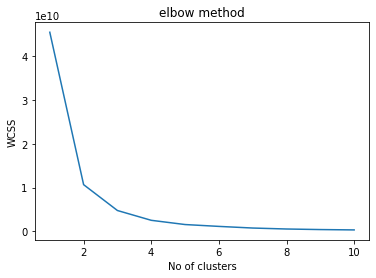

In [30]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',  random_state=21)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
kmeans=KMeans(n_clusters=4, init='k-means++',  random_state=21)
y_means=kmeans.fit_predict(X)

In [32]:
y_means

array([2, 2, 1, 2, 0, 2, 3, 1, 0, 1, 3, 2, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0,
       3, 0, 3, 1, 2, 2, 1, 3, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 3, 2,
       3, 3, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 3, 0, 1, 3,
       1, 0, 1, 3, 2, 3, 1, 2, 0, 0, 3, 2, 0, 2, 3, 1, 3, 0, 3, 2, 0, 1,
       3, 3, 3, 1, 1, 0, 1, 0, 1, 2, 3, 3, 3, 2, 1, 3, 3, 1, 2, 1, 2, 3,
       0, 2, 3, 1, 1, 1, 3, 3, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 3, 1, 3, 3,
       1, 0, 1, 3, 2, 2, 0, 1, 2, 2, 0, 3, 0, 2, 2, 2, 2, 0, 1, 3, 0, 1,
       3, 3, 2, 0, 2, 2, 3, 0, 0, 2, 1, 0, 1, 3, 2, 2, 3, 0, 1, 3, 2, 1,
       2, 0, 2, 1, 2, 3, 3, 0, 3, 3, 0, 2, 1, 3, 0, 1, 0, 1, 1, 0, 1, 0,
       2, 3, 1, 0])

# Plot

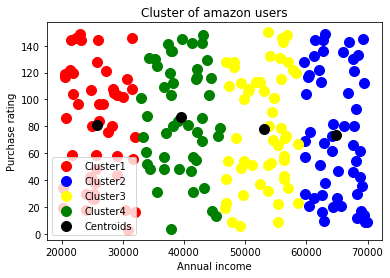

In [36]:
plt.scatter(X[y_means==0,0],X[y_means==0,1], s=100, c='red', label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1], s=100, c='blue', label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1], s=100, c='yellow', label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1], s=100, c='green', label='Cluster4')
#plt.scatter(kmeans.cluster_centers_[:0], kmeans.cluster_centers_[:1], s=100, c='black', label='Centroids')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')

plt.title('Cluster of amazon users')
plt.xlabel('Annual income')
plt.ylabel('Purchase rating')
plt.legend()
plt.show()

for cluster 1 (Red): Mostly equal distributin & around 40% have very high tendency to buy

for cluster 2(green) : Medium to high tendency to buy(~70%), people who have low tendency to buy are very less

for  cluster 3(yellow): Mostly medium level of tendency to buy since number of points in higher and lower brackets are less

for cluster 4(blue) : Almost equal distributtion but to some extent around 30% of the customers 
prefer not to buy. maybe due to the delay of arrival of the product etc.

# 2) Based on AGE and rating

In [40]:
df.columns

Index(['Cus_ID', 'Sex', 'Age', 'Income', 'Rating'], dtype='object')

In [50]:
gender_mapping = {'M': 1, 'F': 0}

# Apply the mapping to the 'gender' column
df['Sex'] = df['Sex'].map(gender_mapping)

In [52]:
df

,Cus_ID,Sex,Age,Income,Rating
0,301219,1,23,53667,150
1,301220,0,32,50420,106
2,301221,1,23,62896,10
3,301222,1,32,55306,22
4,301223,0,34,20634,117
...,...,...,...,...,...
197,301416,1,24,30710,115
198,301417,0,25,55340,66
199,301418,1,26,41269,142
200,301419,0,28,64338,82


In [106]:
X1 = df.iloc[:, [2, 4]].values

In [107]:
X1

array([[ 23, 150],
       [ 32, 106],
       [ 23,  10],
       [ 32,  22],
       [ 34, 117],
       [ 43,   6],
       [ 43, 123],
       [ 22, 133],
       [ 34, 108],
       [ 23,  62],
       [ 29, 125],
       [ 28,  73],
       [ 27,  44],
       [ 25,  66],
       [ 26,  30],
       [ 38,  38],
       [ 23, 128],
       [ 21, 130],
       [ 21,  59],
       [ 22,  42],
       [ 20,   3],
       [ 31,  30],
       [ 32,  57],
       [ 33,  97],
       [ 30,  75],
       [ 39,  16],
       [ 37,   9],
       [ 35, 131],
       [ 30, 149],
       [ 31,  48],
       [ 29,  76],
       [ 28, 105],
       [ 35,  76],
       [ 22,  54],
       [ 20, 145],
       [ 23, 144],
       [ 21, 122],
       [ 27,  71],
       [ 28, 121],
       [ 23, 132],
       [ 29,  14],
       [ 36,  34],
       [ 39, 145],
       [ 31,  54],
       [ 37,  84],
       [ 39,  61],
       [ 20,  70],
       [ 29, 148],
       [ 35,  56],
       [ 23,  84],
       [ 34,  48],
       [ 34,   9],
       [ 23,

C:\Users\prasa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


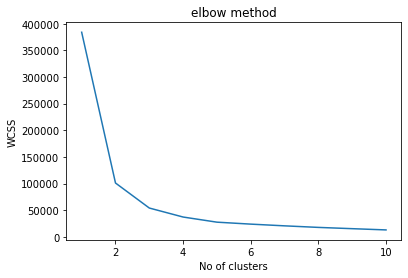

In [108]:
from sklearn.cluster import KMeans
wcss1=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',  random_state=21)
    kmeans.fit(X1)
    wcss1.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss1)
plt.title('elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [109]:
kmeans=KMeans(n_clusters=4, init='k-means++',  random_state=42)
y1=kmeans.fit_predict(X1)

In [110]:
y1

array([3, 1, 2, 2, 1, 2, 1, 3, 1, 0, 3, 0, 2, 0, 2, 2, 3, 3, 0, 2, 2, 2,
       0, 1, 0, 2, 2, 3, 3, 0, 0, 1, 0, 0, 3, 3, 3, 0, 1, 3, 2, 2, 3, 0,
       0, 0, 0, 3, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 3, 2, 2, 2, 3,
       3, 1, 0, 0, 0, 1, 0, 1, 3, 2, 3, 1, 2, 3, 1, 2, 0, 3, 1, 2, 2, 0,
       0, 3, 2, 1, 2, 3, 0, 1, 2, 1, 1, 3, 2, 3, 0, 0, 3, 1, 0, 3, 0, 1,
       2, 1, 3, 0, 2, 0, 2, 1, 1, 1, 1, 2, 0, 0, 3, 1, 3, 2, 0, 1, 0, 0,
       2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 0, 0, 3, 1, 2, 1, 2,
       0, 0, 1, 3, 2, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 2,
       3, 2, 2, 3, 3, 1, 3, 1, 0, 3, 2, 0, 1, 0, 1, 3, 2, 1, 2, 0, 3, 1,
       0, 3, 0, 3])

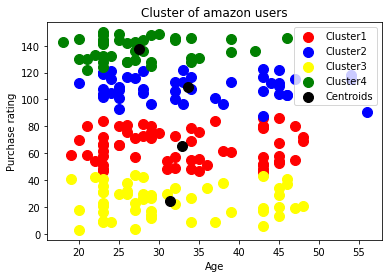

In [111]:
plt.scatter(X1[y1==0,0],X1[y1==0,1], s=100, c='red', label='Cluster1')
plt.scatter(X1[y1==1,0],X1[y1==1,1], s=100, c='blue', label='Cluster2')
plt.scatter(X1[y1==2,0],X1[y1==2,1], s=100, c='yellow', label='Cluster3')
plt.scatter(X1[y1==3,0],X1[y1==3,1], s=100, c='green', label='Cluster4')
#plt.scatter(kmeans.cluster_centers_[:0], kmeans.cluster_centers_[:1], s=100, c='black', label='Centroids')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')

plt.title('Cluster of amazon users')
plt.xlabel('Age')
plt.ylabel('Purchase rating')
plt.legend()
plt.show()

Age = (20-30)

1)Around 20 % of the people from age bracket (20-30) have very high tendency to buy

2) Around 25% have high tendency to buy 

3) Around 30% have medium tendency to buy

4) Around 25% have low tendency to buy

Most of the customes aged 40-50 have a medium to low tendency to buy